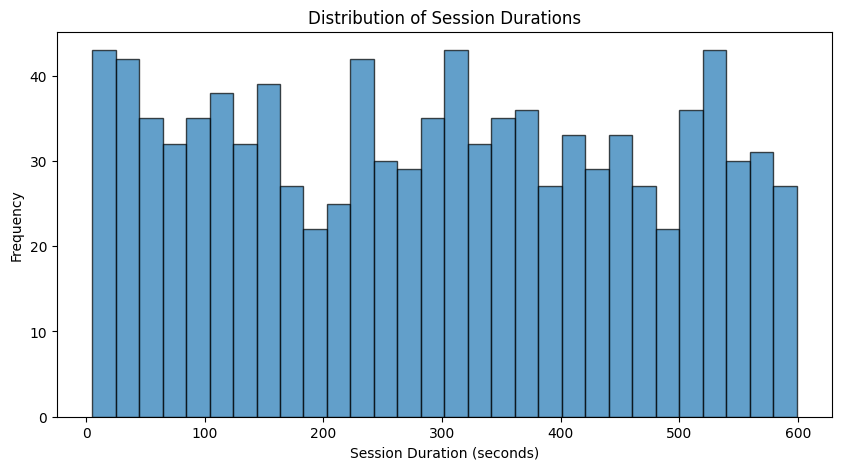

Bounce Rate: 29.09%


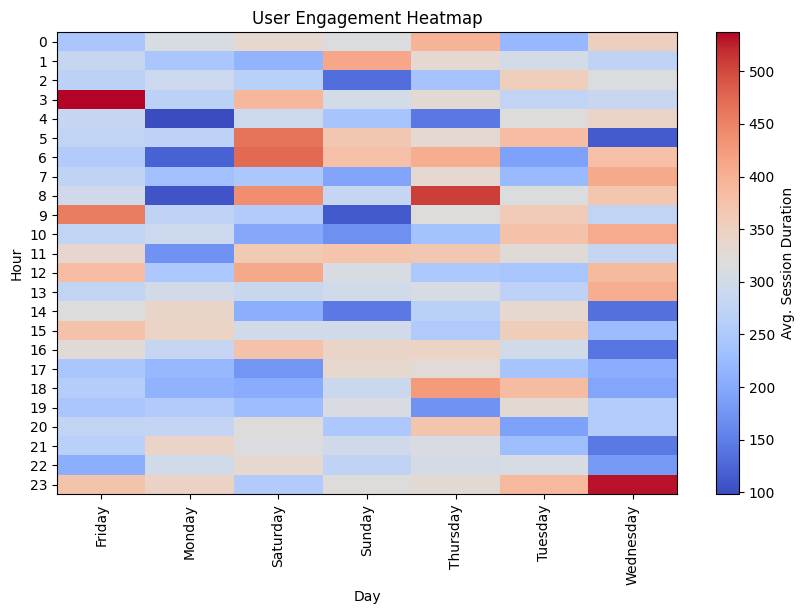

   previous_page current_page  count
2        article     checkout     72
5       category     category     70
3        article        video     69
12        search      article     69
6       category     checkout     68
7       category        video     67
11          home        video     66
13        search     category     62
8           home      article     61
14        search     checkout     58


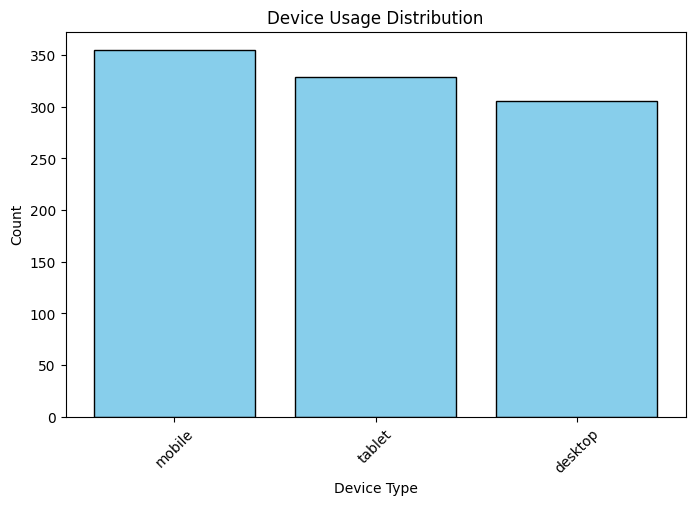

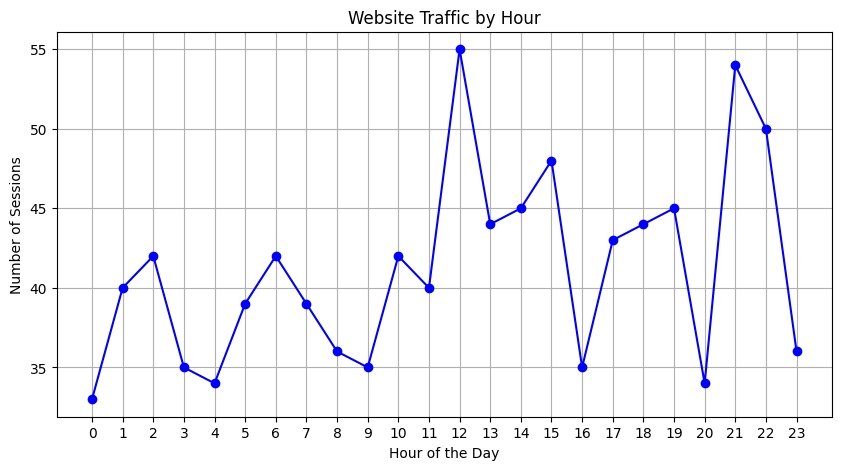

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#LOAD DATASET
data=pd.read_csv("/content/website_traffic.csv")
# Handling missing values
data.fillna({"session_duration": data["session_duration"].median(), "device_type": "unknown"}, inplace=True)

# Filtering out short sessions (less than 5 seconds)
data = data[data["session_duration"] >= 5]

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 5))
plt.hist(data['session_duration'], bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribution of Session Durations")
plt.xlabel("Session Duration (seconds)")
plt.ylabel("Frequency")
plt.show()

# Bounce rate calculation
bounce_rate = (len(data[data["bounce"] == 1]) / len(data)) * 100
print(f"Bounce Rate: {bounce_rate:.2f}%")

# Heatmap visualization for engagement (simulated example)
pivot_table = data.pivot_table(index="hour", columns="day", values="session_duration", aggfunc='mean')
plt.figure(figsize=(10, 6))
plt.imshow(pivot_table, cmap="coolwarm", aspect='auto')
plt.colorbar(label="Avg. Session Duration")
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns, rotation=90)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)
plt.title("User Engagement Heatmap")
plt.xlabel("Day")
plt.ylabel("Hour")
plt.show()

# Clickstream Analysis (Navigation Flow)
navigation_flow = data.groupby(["previous_page", "current_page"]).size().reset_index(name='count')
print(navigation_flow.sort_values(by='count', ascending=False).head(10))

# Additional Data Visualization
# Bar Chart for Device Usage
plt.figure(figsize=(8, 5))
device_counts = data["device_type"].value_counts()
plt.bar(device_counts.index, device_counts.values, color="skyblue", edgecolor="black")
plt.title("Device Usage Distribution")
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Time-Series Analysis for Peak Browsing Hours
hourly_sessions = data.groupby("hour")["session_id"].count()
plt.figure(figsize=(10, 5))
plt.plot(hourly_sessions.index, hourly_sessions.values, marker="o", linestyle="-", color="b")
plt.title("Website Traffic by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Sessions")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

